[1] "1min"   "5min"   "10min"  "30min"  "90min"  "180min" "12h"

[1] "J668_mock_v991"  "J668_mock_Fov7"  "glr19_mock_Fov7"

Warning message:
"Removed 913 rows containing missing values (geom_point)."
Warning message:
"Removed 913 rows containing missing values (geom_point)."


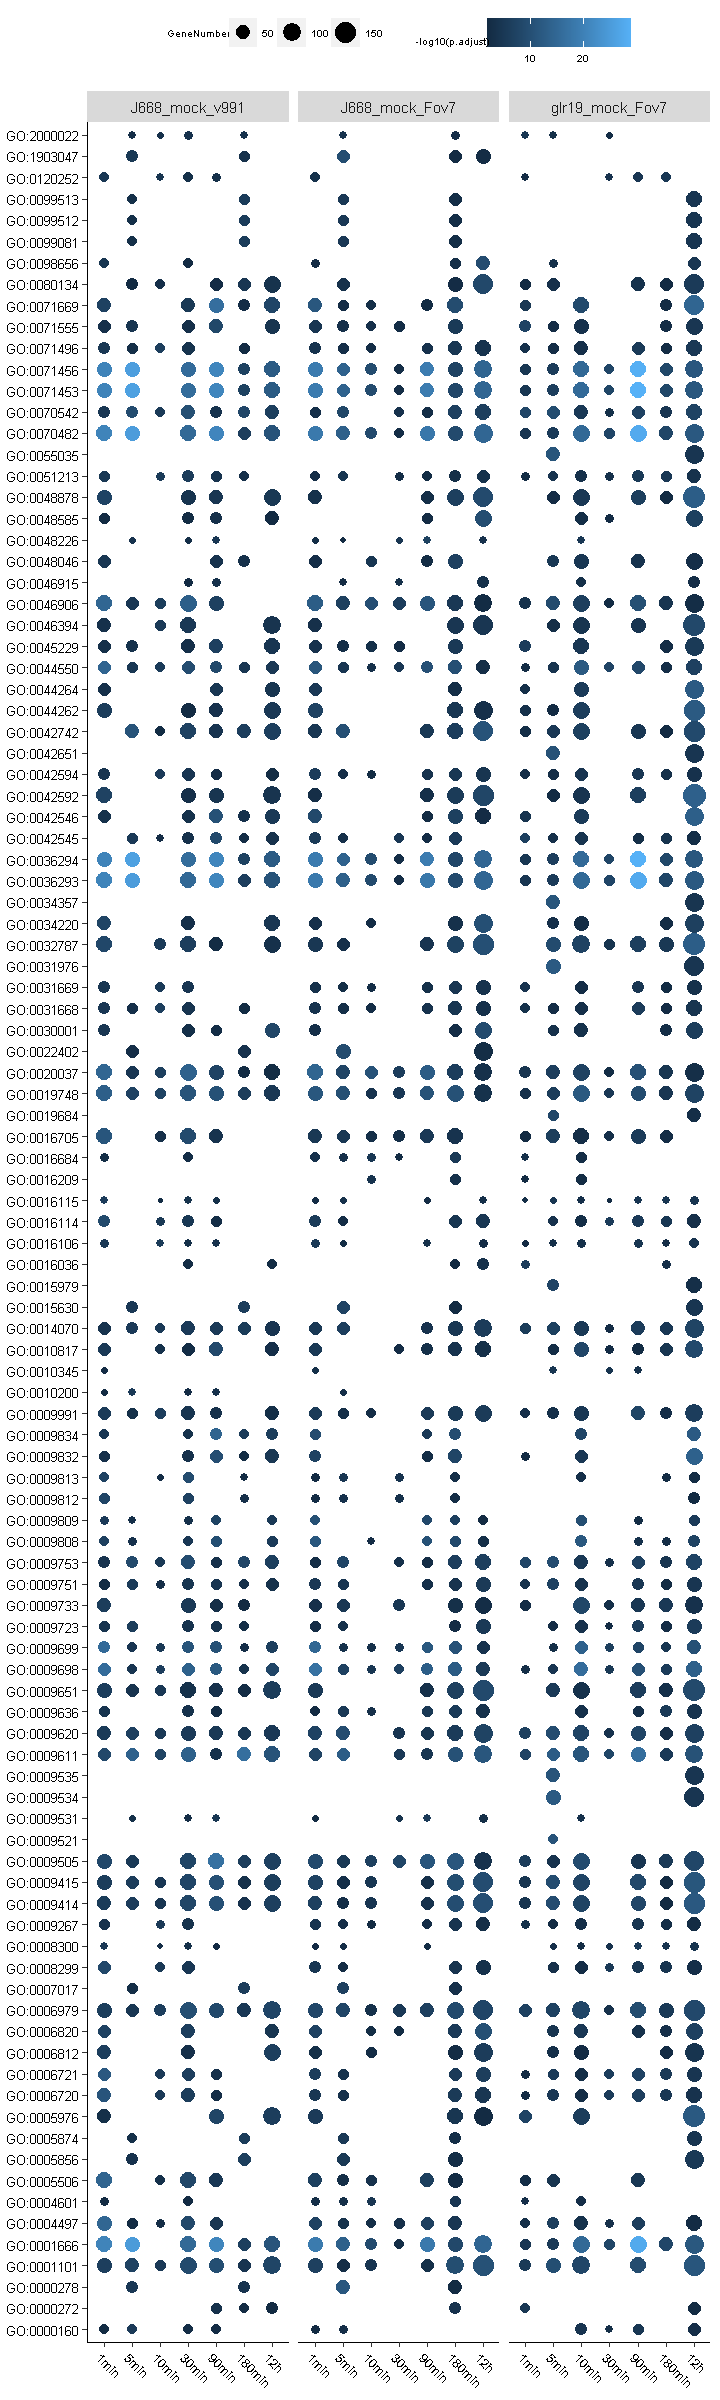

In [26]:
## 分析置信度top 20 的Go terms
options(repr.plot.width = 6, repr.plot.height = 20) 
rm(list=ls())
setwd('G:/VD_FOV_3Dgenome/RNA_Seq/DEG')
library(ggplot2)
df_go <- read.csv('J668_mock_fov7_v991_glr19.txt', sep = '\t', header = T)
#loop_data <- read.csv('all_loop_type_number_subg.txt', sep = '\t', header = T)
df_go <- within(df_go, times <- factor(times, levels = c("1min", "5min", "10min", "30min", "90min", '180min', '12h')))
with(df_go, levels(times))
df_go <- within(df_go, tags <- factor(tags, levels = c("J668_mock_v991", "J668_mock_Fov7", "glr19_mock_Fov7")))
with(df_go, levels(tags))
#View(loop_data)
#dpa0_at <- degree_data[(degree_data$days=='0DPA') & (degree_data$subgenome == 'At'),]
go <- ggplot(df_go, aes(x=times, y=ID, size=GeneNumber, color=-log10(p.adjust))) +
  geom_point()+
  labs(x=NULL, y=NULL) +   #不要标签
  #geom_smooth(se = FALSE) +
  facet_grid(.~tags)+
  #coord_cartesian(xlim = c(2.7,10.3))+
  #scale_x_continuous(breaks = seq(3,11))+
  #scale_y_continuous(breaks = c(0, 2, 1))+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    axis.text=element_text(size=8,angle=0,color="Black"), #设置轴字体
    legend.text = element_text(size=6),
    legend.title = element_text(size=6),
    axis.title =element_text(size=10), #设置标签字体
    axis.text.x = element_text(angle = 315, hjust = 0),
    legend.position="top" #调整图例,
  ) 
go
ggsave(plot =go, filename = 'J668_mock_fov7_v991_glr19.pdf', height = 20, width = 6)
]


In [18]:
library(paletteer) 
paletteer_d("tidyquant::tq_light")

<colors>
#2C3E50FF #E31A1CFF #18BC9CFF #CCBE93FF #A6CEE3FF #1F78B4FF #B2DF8AFF #FB9A99FF #FDBF6FFF #FF7F00FF #CAB2D6FF #6A3D9AFF 

[1] "0min"   "30min"  "90min"  "180min" "12h"

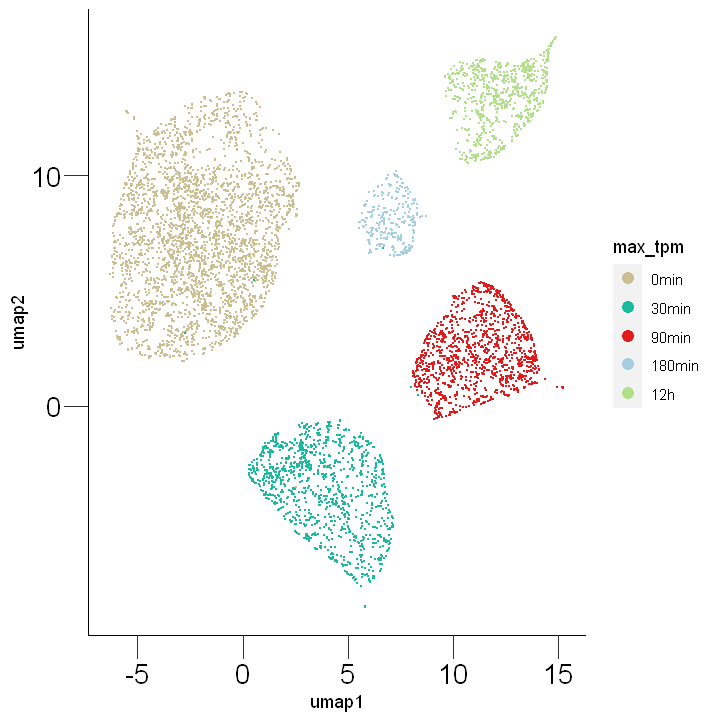

In [31]:
# 分析组织特异性表达基因， 聚类
rm(list = ls())
options(repr.plot.width=6,repr.plot.height=6)
setwd('G:/Billfish/VD_FOV_3Dgenome/RNA_Seq/TAU')
library(ggplot2)
#library(ggpubr)
df <- read.csv('J668_glr_TAU_umap_zscore.bed', sep = '\t', header = T)
df_glr_mock <- df[df$tags=='glr_mock', ]
df_glr_mock <- within(df_glr_mock, max_tpm <- factor(max_tpm, levels = c("0min", "30min", "90min", "180min", "12h")))
with(df_glr_mock, levels(max_tpm))
fg <- ggplot(df_glr_mock, aes(x=umap1, y=umap2, color=max_tpm))+
geom_point(size=0.05)+
#labs(x=NULL, y=NULL)+
theme(panel.background = element_blank(), 
      panel.grid = element_blank(),
      axis.line=element_line(linetype=1,color="black"),
      #legend.position=c(0.25, 0.7),
      axis.ticks.length = unit(0.5, 'cm'),
      axis.text = element_text(size = 16, color="black")
     )+
    guides(color = guide_legend(override.aes = list(size = 3)))+
    scale_color_manual(values = c("#CCBE93FF", "#18BC9CFF", "#E31A1CFF", "#A6CEE3FF", "#B2DF8AFF", "#FB9A99FF", "#FF7F00FF", "#6A3D9AFF")) 
fg
#ggsave(plot =fg, filename = 'J668_mock.pdf', height =3, width = 4)
#ggsave(plot =fg, filename = 'J668_fov7.pdf', height =3, width = 4)
#ggsave(plot =fg, filename = 'J668_v991.pdf', height =3, width = 4)
#ggsave(plot =fg, filename = 'glr_fov7.pdf', height =3, width = 4)
ggsave(plot =fg, filename = 'glr_mock.pdf', height =3, width = 4)




[1] "0min"   "30min"  "90min"  "180min" "12h"

[1] "j668_mock" "j668_fov7" "j668_v991" "glr_mock"  "glr_fov7"

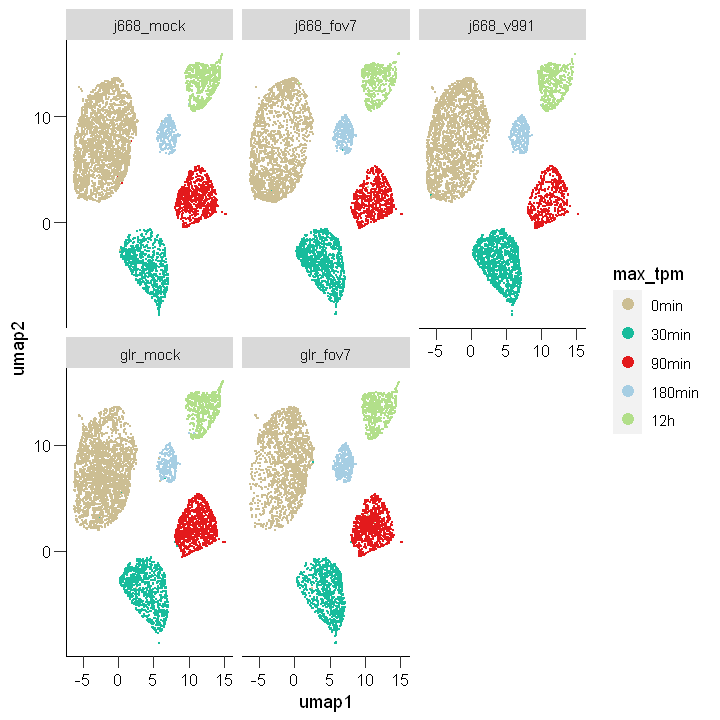

In [45]:
# 分析组织特异性表达基因， 聚类
rm(list = ls())
options(repr.plot.width=6,repr.plot.height=6)
setwd('G:/Billfish/VD_FOV_3Dgenome/RNA_Seq/TAU/0_30_90_180_12h')
library(ggplot2)
#library(ggpubr)
df <- read.csv('J668_glr_TAU_umap_zscore.bed', sep = '\t', header = T)
#df_glr_mock <- df[df$tags=='glr_mock', ]
df <- within(df, max_tpm <- factor(max_tpm, levels = c("0min", "30min", "90min", "180min", "12h")))
with(df, levels(max_tpm))
df <- within(df, tags <- factor(tags, levels = c("j668_mock", "j668_fov7", "j668_v991", "glr_mock", "glr_fov7")))
with(df, levels(tags))
#df
fg <- ggplot(df, aes(x=umap1, y=umap2, color=max_tpm))+
geom_point(size=0.05)+
facet_wrap(.~tags, )+
#facet_grid(.~tags)+
theme(panel.background = element_blank(), 
      panel.grid = element_blank(),
      
      axis.line=element_line(linetype=1,color="black"),
      axis.ticks.length = unit(0.25, 'cm'),
      axis.text = element_text(size = 10, color="black")
     )+
    guides(color = guide_legend(override.aes = list(size = 3)))+
    scale_color_manual(values = c("#CCBE93FF", "#18BC9CFF", "#E31A1CFF", "#A6CEE3FF", "#B2DF8AFF", "#FB9A99FF", "#FF7F00FF", "#6A3D9AFF")) 
fg
ggsave(plot =fg, filename = 'J668_glr_TAU_umap_zscore.pdf', height =4, width = 5)




[1] "0min"   "1min"   "5min"   "10min"  "30min"  "90min"  "180min" "12h"

[1] "j668_mock" "j668_fov7" "j668_v991" "glr_mock"  "glr_fov7"

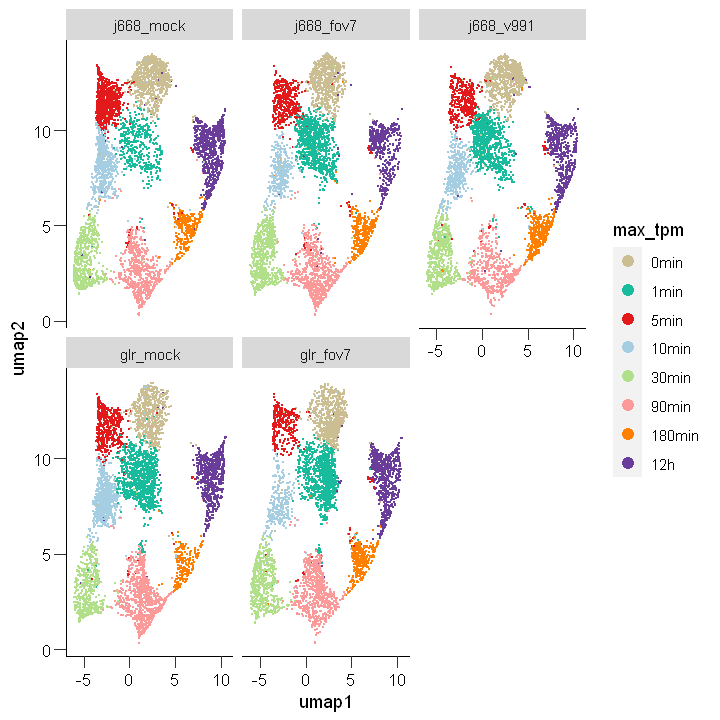

In [48]:
# 分析组织特异性表达基因， 聚类
rm(list = ls())
options(repr.plot.width=6,repr.plot.height=6)
setwd('G:/Billfish/VD_FOV_3Dgenome/RNA_Seq/TAU')
library(ggplot2)
#library(ggpubr)
df <- read.csv('J668_glr_TAU_umap_zscore.bed', sep = '\t', header = T)
#df_glr_mock <- df[df$tags=='glr_mock', ]
df <- within(df, max_tpm <- factor(max_tpm, levels = c("0min", "1min", "5min", "10min", "30min", "90min", "180min", "12h")))
with(df, levels(max_tpm))
df <- within(df, tags <- factor(tags, levels = c("j668_mock", "j668_fov7", "j668_v991", "glr_mock", "glr_fov7")))
with(df, levels(tags))
#df
fg <- ggplot(df, aes(x=umap1, y=umap2, color=max_tpm))+
geom_point(size=0.05)+
facet_wrap(.~tags, )+
#facet_grid(.~tags)+
theme(panel.background = element_blank(), 
      panel.grid = element_blank(),
      
      axis.line=element_line(linetype=1,color="black"),
      axis.ticks.length = unit(0.25, 'cm'),
      axis.text = element_text(size = 10, color="black")
     )+
    guides(color = guide_legend(override.aes = list(size = 3)))+
    scale_color_manual(values = c("#CCBE93FF", "#18BC9CFF", "#E31A1CFF", "#A6CEE3FF", "#B2DF8AFF", "#FB9A99FF", "#FF7F00FF", "#6A3D9AFF")) 
fg
ggsave(plot =fg, filename = 'J668_glr_TAU_umap_zscore.pdf', height =4, width = 5.5)




[1] "1min"   "5min"   "10min"  "30min"  "90min"  "180min" "720min"

[1] "GO:0005388" "GO:0005509" "GO:0017156" "GO:0034614" "GO:0097468"
[6] "GO:0000302"

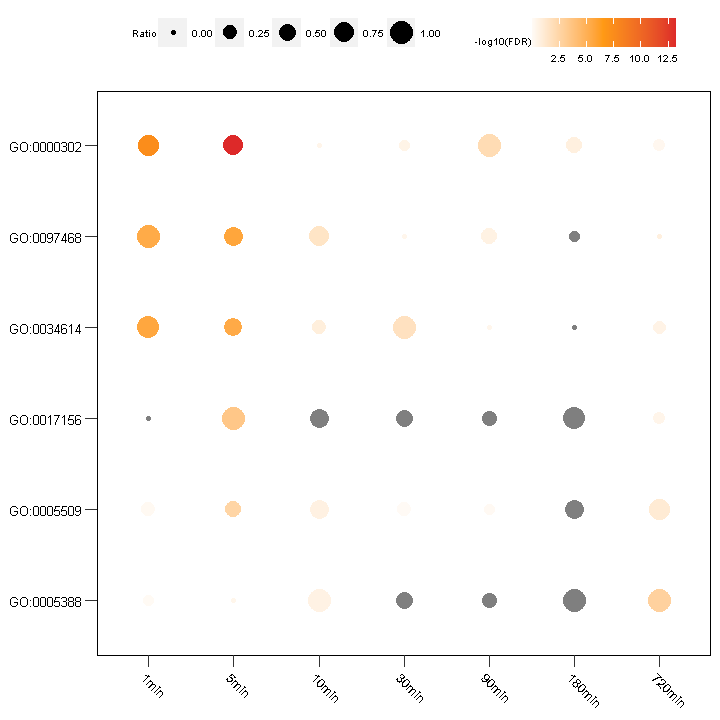

In [29]:
## 分析置信度top 20 的Go terms
options(repr.plot.width = 6, repr.plot.height = 6) 
rm(list=ls())
setwd('G:/Billfish/VD_FOV_3Dgenome/RNA_Seq/DEG/ETI_PTI/PTI/go/oxygen_calcium')
library(ggplot2)
df_go <- read.csv('oxygen_calcium_DEG_ratio_zscore_normal_01_long.bed', sep = '\t', header = T)
#loop_data <- read.csv('all_loop_type_number_subg.txt', sep = '\t', header = T)
df_go <- within(df_go, Times <- factor(Times, levels = c("1min", "5min", "10min", "30min", "90min", '180min', '720min')))
with(df_go, levels(Times))
df_go <- within(df_go, GoTerms <- factor(GoTerms, levels = c("GO:0005388", "GO:0005509", "GO:0017156", "GO:0034614", "GO:0097468", "GO:0000302")))
with(df_go, levels(GoTerms))
#View(loop_data)
#dpa0_at <- degree_data[(degree_data$days=='0DPA') & (degree_data$subgenome == 'At'),]
go <- ggplot(df_go, aes(x=Times, y=GoTerms, size=Ratio, color=-log10(FDR))) +
  geom_point()+
  labs(x=NULL, y=NULL) +   #不要标签
  #geom_smooth(se = FALSE) +
  #coord_cartesian(xlim = c(2.7,10.3))+
  #scale_x_continuous(breaks = seq(3,11))+
  #scale_y_continuous(breaks = c(0, 2, 1))+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill=NA),
    axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    axis.text=element_text(size=8,angle=0,color="Black"), #设置轴字体
    legend.text = element_text(size=6),
    legend.title = element_text(size=6),
    axis.title =element_text(size=10), #设置标签字体
    axis.text.x = element_text(angle = 315, hjust = 0),
    axis.ticks.length = unit(0.25, "cm"),
    legend.position="top" #调整图例,
  )+ 
  scale_color_gradient2(low="white", mid ='#FF9A15', high="#DD2929", midpoint = 6.5)
  #scale_color_gradient2(low="#005A5A", mid ="#D2D2D2",  high="#DD2929", midpoint = 6.5)
  #scale_color_gradient(low="#F0AB97",  high="red")

go
ggsave(plot =go, filename = 'oxygen_calcium_DEG_ratio_zscore_normal_01_long.pdf', height = 3, width = 3)
